# **Exploratory Data Analysis(EDA)**

In [26]:
#library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [27]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UAS Bengkod/ObesityDataSet.csv')

In [29]:
#Melihat 5 Baris Pertama Dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [30]:
# Menampilkan jumlah baris dan kolom
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

Jumlah Baris: 2111
Jumlah Kolom: 17


In [31]:
#Menampilkan Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [32]:
# Menampilkan deskripsi data (statistik deskriptif untuk kolom numerik
print(df.describe())

         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             351  


In [33]:
# Menampilkan tipe data setiap kolom
print(df.dtypes)

Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


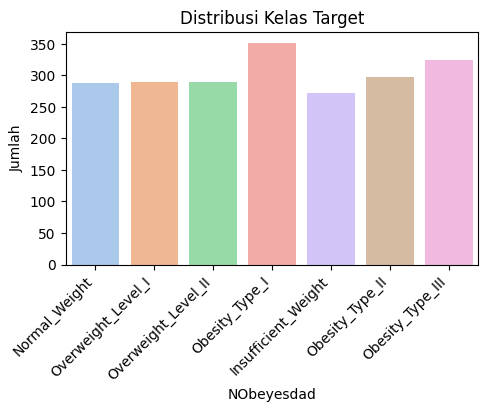

In [34]:
#Distribusi Kelas Target
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="NObeyesdad", hue="NObeyesdad", palette="pastel", legend=False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.title("Distribusi Kelas Target")
plt.ylabel("Jumlah")
plt.show()

In [35]:
#Cek missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [36]:
# Cek unique values pada kolom 'Age'
print("\nUnique Values pada kolom Age:")
print(df['Age'].nunique())
print(df['Age'].unique())


Unique Values pada kolom Age:
1394
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']


In [37]:
#Cek Data Duplikat
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
18


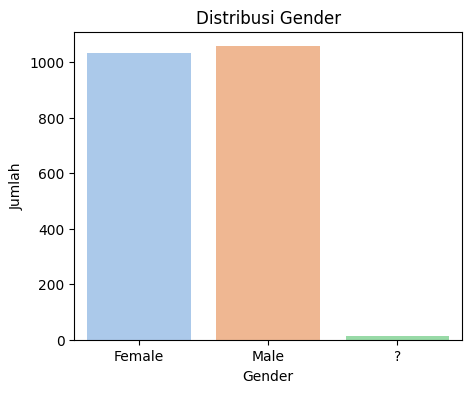

In [41]:
#Disreibusi Gender
plt.figure(figsize=(5,4))
sns.countplot(x=df['Gender'], hue=df['Gender'], palette="pastel", legend=False)
plt.title("Distribusi Gender")
plt.ylabel("Jumlah")
plt.show()

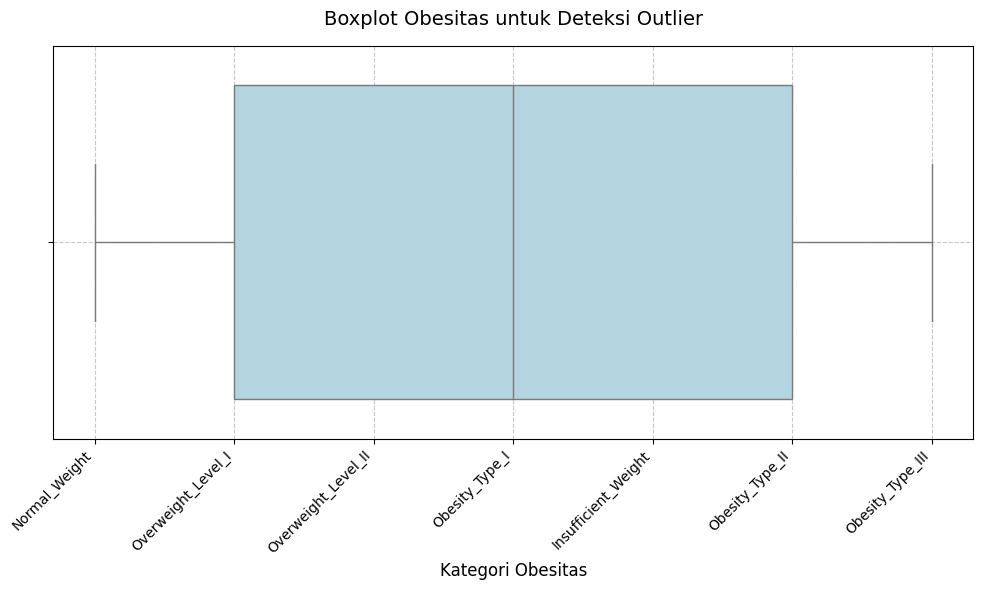

In [39]:
# Membuat boxplot untuk deteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['NObeyesdad'], color="lightblue")
plt.title('Boxplot Obesitas untuk Deteksi Outlier', fontsize=14, pad=15)
plt.xlabel('Kategori Obesitas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Kesimpulan :

Masih terdapat banyak missing value pada masing-masing kolom. Tipe data kolom masih berupa object semua, perlu diubah ke numerik di tahap pre-processing nanti. Disteribusi Kelas Target juga masih imbalance dan OUtlier juga tidak menunjukkan distribusi yang  jelas, sehingga perlu dilakukan penanganan/handling di tahap pre-processing nanti.